<a href="https://colab.research.google.com/github/Madhusudan3223/ai-object-describer/blob/main/Vision_Based_AI_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision-Based AI Agent (YOLO + Gemini)

This project is an AI-powered image analysis agent that uses **YOLOv8** for object detection and **Gemini API** for generating natural-language descriptions of images. It includes a **fallback mechanism** to use YOLO-only descriptions when Gemini API quota is exceeded.

---

## Installation

Install the required Python packages:

In [1]:
!pip install ultralytics opencv-python-headless openai streamlit numpy pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/2

## Installation

Install the required Python packages:


In [2]:
import ultralytics
import cv2
import openai
import streamlit
import numpy as np
import pandas as pd

print("All libraries installed and imported successfully!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
All libraries installed and imported successfully!


In [3]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load pre-trained YOLOv8 model (yolov8n = nano, fastest)
model = YOLO("yolov8n.pt")


## Image Upload in Google Colab

This snippet allows you to upload an image from your local computer when using Google Colab.



In [4]:
from google.colab import files

uploaded = files.upload()  # This will let you upload an image from your computer


Saving AP17172603241117.webp to AP17172603241117.webp


## YOLOv8 Object Detection on Uploaded Image

This snippet runs YOLOv8 object detection on an image uploaded in Google Colab and displays the results.



image 1/1 /content/AP17172603241117.webp: 448x640 1 truck, 1 sheep, 7.1ms
Speed: 2.6ms preprocess, 7.1ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


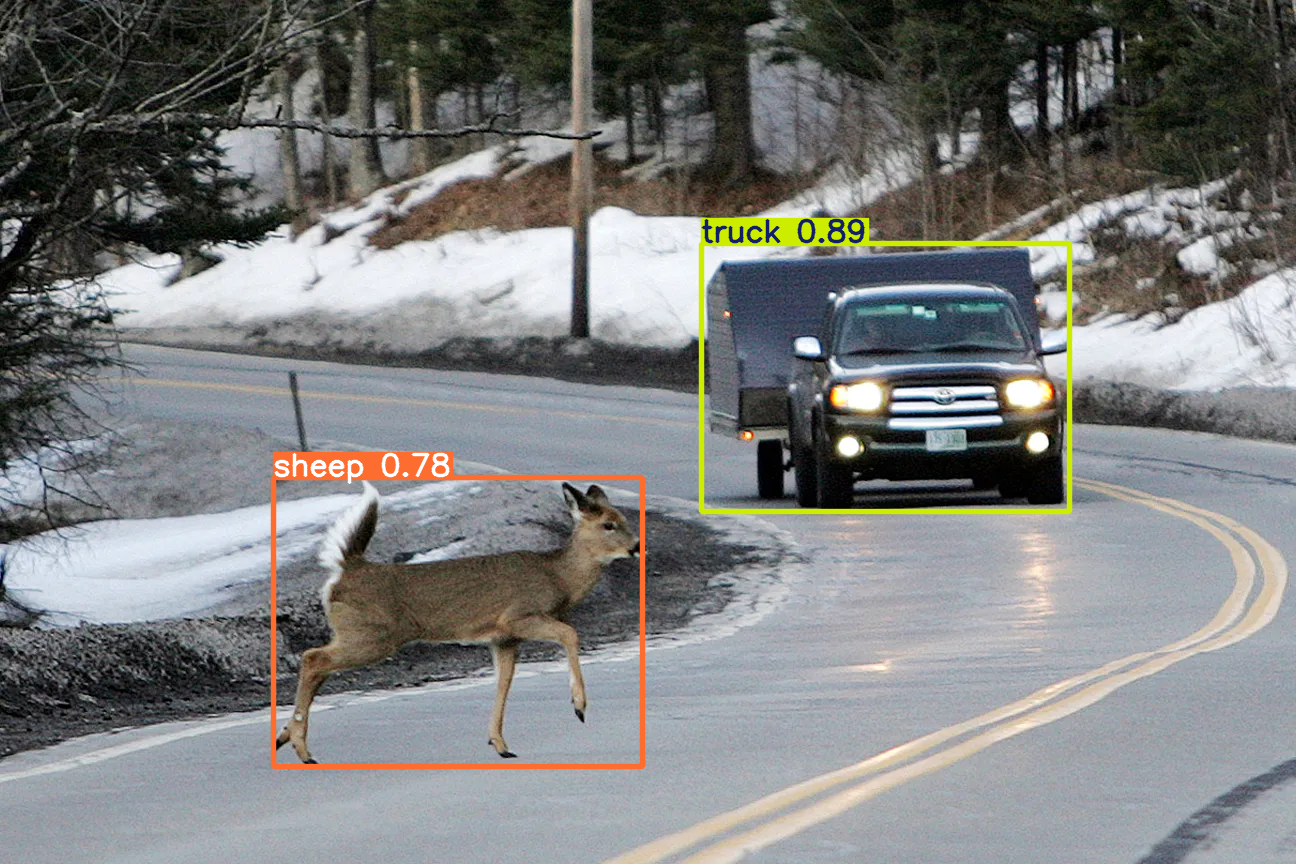

In [6]:
# Get the uploaded image filename
image_path = list(uploaded.keys())[0]

# Run YOLOv8 detection
results = model(image_path)

# Show the results
results[0].show() # Corrected line

## Video Upload in Google Colab

This snippet allows you to upload a short video (5–15 seconds) from your local computer when using Google Colab.


In [7]:
from google.colab import files

uploaded = files.upload()  # Upload a short video (5–15 seconds is enough)
video_path = list(uploaded.keys())[0]


Saving 27260-362770008_small.mp4 to 27260-362770008_small.mp4


## YOLOv8 Object Detection on Video

This snippet runs YOLOv8 object detection on an uploaded video in Google Colab and saves the detection results.


In [8]:
# Load YOLO model (if not already loaded)
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

# Run detection on video and save results
results = model.predict(source=video_path, save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/335) /content/27260-362770008_small.mp4: 384x640 (no detections), 46.5ms
video 1/1 (frame 2/335) /content/27260-362770008_small.mp4: 384x640 (no detections), 6.6ms
video 1/1 (frame 3/335) /content/27260-362770008_small.mp4: 384x640 (no detections), 6.4ms
video 1/1 (frame 4/335) /content/27260-362770008_small.mp4: 384x640 1 car, 6.7ms
video 1/1 (frame 5/335) /content/27260-362770008_small.mp4: 384x640 2 cars, 6.3ms
video 1/1 (frame 6/

## Installing Gemini API

To use the Gemini API for generating image or video descriptions, install the official Gemini Python package:


In [9]:
!pip install gemini


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 25.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of ipykernel to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at mul

## Gemini API Integration for Object Descriptions

This snippet uses the **Gemini API** to generate natural-language descriptions of objects detected by YOLOv8.



In [11]:
import google.generativeai as genai
from google.colab import userdata

# Retrieve the API key from Colab secrets
API_KEY = userdata.get("GEMINI_API")
# Ensure API_KEY is not None before proceeding
if API_KEY is None:
  raise ValueError("GEMINI_API not found in Colab secrets. Please add it to the secrets manager.")

# Configure the API
genai.configure(api_key=API_KEY)

def get_gemini_description(object_name):
    # Initialize the Gemini model
    # Using gemini-1.5-flash as it's generally available
    model = genai.GenerativeModel('gemini-1.5-flash')

    # Generate content
    response = model.generate_content(f"Describe in one sentence what a {object_name} is.")

    # Assuming response has text attribute
    return response.text.strip()

print(get_gemini_description("car"))

A car is a self-propelled passenger vehicle designed for road travel.


## Generate Multiple Descriptions with Gemini API

This snippet generates multiple natural-language descriptions for a detected object using the Gemini API.


In [22]:
def get_gemini_descriptions(object_name, n=5, temperature=0.7):
    model = genai.GenerativeModel("gemini-1.5-flash")
    descriptions = []

    for _ in range(n):
        response = model.generate_content(
            f"Describe in one sentence what a {object_name} is.",
            generation_config=genai.GenerationConfig(temperature=temperature)
        )
        descriptions.append(response.text.strip())

    return descriptions

# Test it
results = get_gemini_descriptions("car", n=5, temperature=0.8)
for idx, desc in enumerate(results, 1):
    print(f"{idx}. {desc}")

1. A car is a self-propelled passenger vehicle designed for road travel.
2. A car is a self-propelled passenger vehicle designed for road transportation.
3. A car is a self-propelled passenger vehicle designed for road travel.
4. A car is a self-propelled passenger vehicle designed for road travel.
5. A car is a self-propelled wheeled vehicle designed for passenger transportation.


## Generate Unique Descriptions with Gemini API

This snippet generates multiple **unique** natural-language descriptions for a detected object using the Gemini API.



In [24]:
def get_gemini_descriptions(object_name, n=5, temperature=1.0):
    model = genai.GenerativeModel('gemini-1.5-flash')
    unique_responses = set()  # To store unique outputs

    attempts = 0  # Safety to prevent infinite loops
    max_attempts = n * 3  # Try up to 3 times per required output

    while len(unique_responses) < n and attempts < max_attempts:
        attempts += 1
        response = model.generate_content(
            f"Describe in one sentence what a {object_name} is.",
            generation_config=genai.GenerationConfig(temperature=temperature)
        )
        text = response.text.strip()
        unique_responses.add(text)

    return list(unique_responses)

# Test it
results = get_gemini_descriptions("car", n=5, temperature=1.2)
for idx, desc in enumerate(results, 1):
    print(f"{idx}. {desc}")

1. A car is a self-propelled passenger vehicle designed for road travel.
2. A car is a self-propelled passenger vehicle designed for road transportation.


## Generate Diverse Gemini Descriptions

This snippet generates multiple **diverse and uniquely worded** descriptions for a detected object using the Gemini API.


In [26]:
def get_diverse_gemini_descriptions(object_name, n=5, temperature=1.5):
    model = genai.GenerativeModel('gemini-1.5-flash')
    unique_responses = set()

    attempts = 0
    max_attempts = n * 5

    while len(unique_responses) < n and attempts < max_attempts:
        attempts += 1
        prompt = f"Give a unique, one-sentence description of a {object_name} using different wording each time."
        response = model.generate_content(
            prompt,
            generation_config=genai.GenerationConfig(temperature=temperature)
        )
        text = response.text.strip()
        unique_responses.add(text)

    return list(unique_responses)

# Test it
results = get_diverse_gemini_descriptions("car", n=5)
for idx, desc in enumerate(results, 1):
    print(f"{idx}. {desc}")

1. Here are five unique, one-sentence descriptions of a car, each using different wording:

1.  A chrome-glinted machine, its engine a symphony of controlled combustion, purred impatiently beneath the impatient driver.
2.  Sleek lines and a powerful stance spoke of unbridled speed, a predator poised to devour the open road.
3.  More than just transportation, it was a rolling sculpture, its every curve a testament to automotive artistry.
4.  A cocoon of leather and technology, it whispered promises of effortless journeys to faraway horizons.
5.  Its metallic shell, a vibrant jewel against the asphalt, housed a heart of fire, eager for adventure.
2. Here are some unique, one-sentence descriptions of a car, each using different wording:

1.  A chrome-glinted behemoth, it roared defiance against the mundane.
2.  Its sleek lines whispered promises of untamed speed and effortless grace.
3.  A symphony of polished steel and humming mechanics, it awaited its next command.
4.  An emblem of free

## Installing Google Generative AI (Gemini API) Python Package

To use the Gemini API via Python, install the official Google Generative AI library:


In [27]:
!pip install google-generativeai


## Configure Gemini API in Colab

This snippet securely retrieves your Gemini API key from Colab secrets and configures the Gemini API for use.


In [28]:
import google.generativeai as genai
from google.colab import userdata  # to fetch secret safely

# Retrieve API key
API_KEY = userdata.get("GEMINI_API")

if API_KEY is None:
    raise ValueError("GEMINI_API not found in Colab secrets. Please add it to Colab secrets.")

# Configure Gemini API
genai.configure(api_key=API_KEY)


## Generate Creative Object Descriptions with Gemini API

This snippet generates multiple **creative, one-sentence descriptions** for a detected object using the Gemini API.


In [29]:
def get_gemini_descriptions(object_name, n=5):
    """
    Generate n unique one-sentence descriptions of an object using Gemini API.
    """
    model = genai.GenerativeModel("gemini-1.5-flash")  # model name

    descriptions = []
    for i in range(n):
        response = model.generate_content(f"Describe in one sentence what a {object_name} is in a creative way.")
        descriptions.append(response.text.strip())

    return descriptions

# Test it
results = get_gemini_descriptions("car", n=5)
for idx, desc in enumerate(results, 1):
    print(f"{idx}. {desc}")


1. A car is a four-wheeled chariot of freedom, powered by dreams and fueled by gasoline.
2. A car is a four-wheeled dream, a metal steed that tames the open road and carries its rider to the horizon.
3. A car is a metal steed, tamed by a steering wheel and fueled by dreams of open roads.
4. A car is a four-wheeled chariot of freedom, powered by dreams and fueled by gasoline.
5. A car is a four-wheeled chariot of freedom, fueled by dreams and asphalt.
